In [183]:
import os, sys
import yfinance as yf
# import ta
import pandas as pd
import numpy as np
import vectorbt as vbt
from datetime import date, timedelta, datetime
from itertools import product
from IPython.display import clear_output
import matplotlib.pyplot as plt
from csv import writer
import warnings

In [192]:
import talib as ta
import math
import re

In [188]:
from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [175]:
# ticker = ["NVDA",
# "AAPL",
# "MSFT",
# "AMZN",
# "GOOGL",
# "GOOG",
# "META",
# "TSLA",
# "AVGO",
# "COST",
# "NFLX",
# "ASML",
# "TMUS",
# "AMD",
# "CSCO",
# "PEP",
# "ADBE",
# "LIN",
# "AZN",
# "TXN",
# "QCOM	",
# "INTU",
# "ISRG",
# "AMGN	",
# "CMCSA",
# "PDD",
# "BKNG",
# "AMAT",
# "ARM",
# "HON",
# "VRTX",
# "PANW",
# "ADP",
# "MU",
# "GILD",
# "ADI",
# "SBUX",
# "MELI",
# "INTC",
# "LRCX",
# "KLAC",
# "MDLZ",
# "ABNB",
# "REGN",
# "CTAS",
# "SNPS",
# "CDNS",
# "PYPL",
# "CRWD",
# "MRVL",
# "MAR",
# "CEG",
# "CSX",
# "ORLY",
# "DASH",
# "WDAY",
# "CHTR",
# "ADSK",
# "FTNT",
# "TTD",
# "ROP",
# "PCAR",
# "NXPI",
# "TEAM",
# "FANG",
# "MNST",
# "CPRT",
# "PAYX",
# "AEP",
# "ODFL",
# "ROST",
# "FAST",
# "KDP",
# "DDOG",
# "EA",
# "BKR",
# "KHC",
# "MCHP",
# "VRSK",
# "GEHC",
# "CTSH",
# "LULU",
# "EXC",
# "XEL",
# "CCEP",
# "IDXX",
# "ON",
# "CSGP",
# "ZS",
# "TTWO",
# "ANSS",
# "CDW",
# "DXCM",
# "BIIB",
# "GFS",
# "ILMN",
# "MDB",
# "WBD",
# "MRNA",
# "DLTR",
# "WBA"]

In [332]:
ticker = ["MSFT", "AMZN", "NAT", "BAC", "DPZ", "DIS", "KO", "MCD", "COST", "SBUX"]
treasury_bond = ["^TYX"]

In [260]:
def download_data(list_of_tickers, interval='1d'):
    # dt_range = pd.date_range('2019-12-31', '2020-12-31', freq='6m') 
    # define start and end date
    # end_date = datetime.now()-timedelta(days=30)
    # start_date = end_date - timedelta(days=390)

    end_date = datetime.now() #- timedelta(days=30)
    start_date = end_date - timedelta(days=1855)

    # extract data from yahoo finanace
    btc_price = vbt.YFData.download(
    list_of_tickers,
    interval=interval,
    start = start_date,
    end = end_date,
    missing_index='drop').get("Close")
    return pd.DataFrame(btc_price)

In [285]:
df = pd.DataFrame()
# ticker = treasury_bond
for _t in ticker:
    print(_t)
    try:
        if df.empty:
            df=download_data([_t])
            df.rename(columns={"Close":_t}, inplace=True)
            df.index=df.index.strftime("%Y-%m-%d")
            df.index = pd.to_datetime(df.index)
        else:
            df1 = pd.DataFrame()
            df1 = download_data([_t])
            df1.rename(columns={"Close":_t}, inplace=True)
            df1.index=df.index.strftime("%Y-%m-%d")
            df1.index = pd.to_datetime(df.index)
            df = pd.merge(df, df1, left_index=True, right_index=True, how='inner')  # Only keep matching rows
            # print(df.head())
    except Exception as err:
        print(err)

^TYX


In [288]:
df.columns

Index(['^TYX'], dtype='object')

In [133]:
# _t="MSFT"
# df=download_data(_t)
# df.rename(columns={"Close":_t}, inplace=True)

# _t="AMZN"
# df1=download_data(_t)
# df1.rename(columns={"Close":_t}, inplace=True)

# df = pd.merge(df, df1, left_index=True, right_index=True, how='inner')


In [370]:
df_asset.columns

Index(['MSFT', 'AMZN', 'NAT', 'BAC', 'DPZ', 'DIS', 'KO', 'MCD', 'COST', 'SBUX',
       ...
       'MSFT_pct_change_20', 'AMZN_pct_change_20', 'NAT_pct_change_20',
       'BAC_pct_change_20', 'DPZ_pct_change_20', 'DIS_pct_change_20',
       'KO_pct_change_20', 'MCD_pct_change_20', 'COST_pct_change_20',
       'SBUX_pct_change_20'],
      dtype='object', length=140)

In [179]:
# Use in case you construct the dataframe with a list of stocks 
# df.index=df.index.strftime("%Y-%m-%d")
# df.index = pd.to_datetime(df.index)

In [184]:
def percentile(window):
    index = window.index[-1]
    window = window.rank(method="min", ascending=True).apply(lambda x: (x/20)*100)
    return window.loc[index]

In [185]:
def stochastic_k(price, period):
    index = price.index[-1]
    sorted_price = price.sort_values(ascending=True)
    # print(sorted_price)
    closing_price = price.loc[index]
    # print(closing_price)
    highest_high = sorted_price.iloc[-1]
    # print(highest_high)
    lowest_low = sorted_price.iloc[0]
    # print(lowest_low)
    per_k = (closing_price - lowest_low)/(highest_high-lowest_low)*100
    return per_k

In [186]:
def zscore(x):
    return (math.erf(6-(12*(x/100))))

In [299]:
# df = df_asset
df = df_treasury
for _t in treasury_bond:
    try:
        print(_t)
        # df[f"{_t}_rsi_20"] = ta.RSI(df[_t], timeperiod=20)
        # df[f"{_t}_rsi_20_percentile_last_20"]=df[f"{_t}_rsi_20"].rolling(window=20).apply(percentile)
        # df[f"{_t}_sto_fast_20"]=df[f"{_t}"].rolling(window=20).apply(lambda x: stochastic_k(x, 20))
        # df[f"{_t}_sto_slow_20"]=ta.SMA(df[f"{_t}_sto_fast_20"],3)
        # df[f"{_t}_sto_slow_20_percentile_last_20"]=df[f"{_t}_sto_slow_20"].rolling(window=20).apply(percentile)
        # df[f"{_t}_sma_20"] = ta.SMA(df[f"{_t}"],20)
        # df[f"{_t}_std_20"] = df[f"{_t}"].rolling(window=20).std()
        # df[f"{_t}_lamda_20"] = (df[f"{_t}"] - df[f"{_t}_sma_20"])/df[f"{_t}_std_20"]
        # df[f"{_t}_lamda_20_percentile_lst_20"] = df[f"{_t}_lamda_20"].rolling(window=20).apply(percentile)
        # df[f"{_t}_rsi_20_zscore"] = df[f"{_t}_rsi_20_percentile_last_20"].apply(zscore)
        # df[f"{_t}_sto_slow_20_zscore"] = df[f"{_t}_sto_slow_20_percentile_last_20"].apply(zscore)
        # df[f"{_t}_lamda_20_zscore"] = df[f"{_t}_lamda_20_percentile_lst_20"].apply(zscore)
        df[f"{_t}_pct_change_20"] = df[f"{_t}"].pct_change(20)
    except Exception as err:
        print(f"Error  {err}")
    

^TYX


In [304]:
df_sharpe = df_asset[[col for col in df_asset.columns for _t in ticker if re.search(f"{_t}.*pct_change_20$|^{_t}$", col)]]

In [305]:
df_sharpe.columns

Index(['MSFT', 'AMZN', 'NAT', 'BAC', 'DPZ', 'DIS', 'KO', 'MCD', 'COST', 'SBUX',
       'MSFT_pct_change_20', 'AMZN_pct_change_20', 'NAT_pct_change_20',
       'BAC_pct_change_20', 'DPZ_pct_change_20', 'DIS_pct_change_20',
       'KO_pct_change_20', 'MCD_pct_change_20', 'COST_pct_change_20',
       'SBUX_pct_change_20'],
      dtype='object')

In [306]:
df_sharpe = pd.merge(df_sharpe, df_treasury, left_index=True, right_index=True, how="inner")

In [308]:
df_sharpe.shape

(1278, 22)

In [313]:
ticker.extend(treasury_bond)

None


In [317]:
ticker = [col for col in df_sharpe.columns for _t in ticker if re.search(f"{_t}.*pct_change_20$", col)]

In [324]:
df_sharpe.drop(ticker+treasury_bond, axis=1, inplace=True)

In [335]:
df_sharpe.shape

(1278, 12)

In [336]:
for _t in ticker:
    df_sharpe[f"{_t}_return_std_20"] = df_sharpe[f"{_t}_pct_change_20"].rolling(window=20).std()
    df_sharpe[f"{_t}_sharpe_ratio"] = (df_sharpe[f"{_t}_pct_change_20"] - df_sharpe[f"{treasury_bond[0]}_pct_change_20"])/df_sharpe[f"{_t}_return_std_20"]

In [365]:
import sys
def rank_asset_sharpe(row):
    # print(row.sort_values(ascending=True))
    size = len(row)
    sorted_row = row.sort_values(ascending=True) 
    buy_recom_tech = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[math.floor(size*.75):].index)]
    sell_recom_tech = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[:math.floor(size*.25)].index)]
    return buy_recom_tech, sell_recom_tech

In [357]:
df_sharpe.dropna(inplace=True)

In [366]:
# Apply the function row-wise and unpack the results into multiple columns
df_sharpe[["buy_recommendation_sharpe", "sell_recommendation_sharpe"]] = \
df_sharpe[[col for col in df_sharpe.columns if re.search(f".*sharpe_ratio$", col)]].apply(rank_asset_sharpe, axis=1, result_type='expand')

In [368]:
df_sharpe.head()

,MSFT_pct_change_20,AMZN_pct_change_20,NAT_pct_change_20,BAC_pct_change_20,DPZ_pct_change_20,DIS_pct_change_20,KO_pct_change_20,MCD_pct_change_20,COST_pct_change_20,SBUX_pct_change_20,...,KO_return_std_20,KO_sharpe_ratio,MCD_return_std_20,MCD_sharpe_ratio,COST_return_std_20,COST_sharpe_ratio,SBUX_return_std_20,SBUX_sharpe_ratio,buy_recommendation_sharpe,sell_recommendation_sharpe
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-05,0.044288,-0.030789,0.088089,0.014659,0.032575,0.123181,0.033992,0.006564,-0.028086,0.022679,...,0.022351,2.494718,0.038286,0.740012,0.011966,-0.528072,0.028464,1.561496,"[{'KO': 2.49471800033549}, {'MSFT': 3.24665421...","[{'COST': -0.5280723695995184}, {'AMZN': -0.44..."
2019-12-06,0.055500,-0.020468,0.211744,0.018773,0.013761,0.110559,0.048508,0.018241,-0.033616,0.058591,...,0.025547,3.837294,0.037064,1.828266,0.014175,1.122057,0.029576,3.655377,"[{'KO': 3.8372944140467844}, {'DIS': 4.9754078...","[{'COST': 1.122056944038532}, {'AMZN': 1.62234..."
2019-12-09,0.040525,-0.020365,0.275582,0.013017,0.020345,0.059800,0.043361,0.011971,-0.024652,0.060430,...,0.027589,3.866099,0.035963,2.093043,0.015226,2.538362,0.029175,4.241062,"[{'KO': 3.866098609284175}, {'SBUX': 4.2410618...","[{'MCD': 2.093043185521019}, {'BAC': 2.2352275..."
2019-12-10,0.037878,-0.018311,0.236231,0.016065,0.016210,0.068451,0.044978,0.018477,-0.016820,0.049013,...,0.028949,4.030213,0.034408,2.620595,0.015619,3.513301,0.027255,4.428792,"[{'SBUX': 4.428792132022334}, {'DIS': 4.540825...","[{'NAT': 2.4280057398202164}, {'MCD': 2.620595..."
2019-12-11,0.034991,-0.016468,0.203981,0.022172,0.056643,0.065017,0.051112,0.013907,-0.017304,0.039246,...,0.029876,4.013447,0.032677,2.530759,0.016033,3.211427,0.025688,4.205837,"[{'SBUX': 4.20583679182492}, {'DIS': 4.2963861...","[{'NAT': 2.0369108215531715}, {'MCD': 2.530759..."


In [266]:
df_original = df.copy()

In [289]:
df_asset = df_original.copy()
df_treasury = df.copy()

In [371]:
df_performance_rank = df_original.copy()

In [374]:
df_performance_rank = df_performance_rank[ticker]

In [375]:
for _t in ticker:
    df_performance_rank[f"{_t}_performance_rank"] = ((df_performance_rank[f"{_t}"] - df_performance_rank[f"{_t}"].shift(5))/df_performance_rank[f"{_t}"])*100

In [376]:
df_performance_rank.columns

Index(['MSFT', 'AMZN', 'NAT', 'BAC', 'DPZ', 'DIS', 'KO', 'MCD', 'COST', 'SBUX',
       'MSFT_performance_rank', 'AMZN_performance_rank',
       'NAT_performance_rank', 'BAC_performance_rank', 'DPZ_performance_rank',
       'DIS_performance_rank', 'KO_performance_rank', 'MCD_performance_rank',
       'COST_performance_rank', 'SBUX_performance_rank'],
      dtype='object')

In [379]:
import sys
def rank_asset_performance(row):
    # print(row.sort_values(ascending=True))
    size = len(row)
    sorted_row = row.sort_values(ascending=True) 
    buy_recom_per = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[math.floor(size*.75):].index)]
    sell_recom_per = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[:math.floor(size*.25)].index)]
    return buy_recom_per, sell_recom_per

In [380]:
# Apply the function row-wise and unpack the results into multiple columns
df_performance_rank[["buy_recommendation_per", "sell_recommendation_per"]] = df_performance_rank.apply(rank_asset_performance, axis=1, result_type='expand')

In [383]:
df_performance_rank.dropna(inplace=True)

In [384]:
df_performance_rank.head()

,MSFT,AMZN,NAT,BAC,DPZ,DIS,KO,MCD,COST,SBUX,...,NAT_performance_rank,BAC_performance_rank,DPZ_performance_rank,DIS_performance_rank,KO_performance_rank,MCD_performance_rank,COST_performance_rank,SBUX_performance_rank,buy_recommendation_per,sell_recommendation_per
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-17,133.424896,89.374001,2.639202,26.724695,242.758667,130.551910,46.072277,184.166718,277.312317,77.639999,...,2.784812,5.981492,0.655121,2.289042,0.241671,-2.373684,1.739414,0.382413,"[{'DI': 130.55191040039062}, {'MSF': 133.42489...","[{'MCD': -2.3736841887228604}, {'KO': 0.241671..."
2019-10-18,131.247177,87.875504,2.672610,26.804176,242.048660,129.092239,46.920231,185.635773,277.734161,77.406067,...,-3.249978,4.744644,-0.817373,0.664690,2.701682,-0.249387,1.736794,-0.383579,"[{'DI': 129.0922393798828}, {'MSF': 131.247177...","[{'NAT': -3.2499778317744803}, {'MSFT': -1.651..."
2019-10-21,132.221375,89.282997,2.632520,27.395901,243.771515,128.470886,46.449154,186.837753,276.101837,76.794235,...,-6.598986,6.060616,2.065873,0.429897,1.714904,0.700521,1.182418,-1.487983,"[{'DI': 128.47088623046875}, {'MSF': 132.22137...","[{'NAT': -6.598986196734346}, {'SBUX': -1.4879..."
2019-10-22,130.253769,88.286499,2.665928,27.554873,245.115723,130.581512,46.123676,177.417938,275.083923,75.093697,...,3.258159,4.711543,1.239686,1.993961,0.631401,-3.989555,0.526728,-3.582550,"[{'MSF': 130.25376892089844}, {'DI': 130.58151...","[{'MCD': -3.9895548926307844}, {'MSFT': -3.813..."
2019-10-23,131.084778,88.108498,2.819602,27.749170,242.332642,129.328949,46.800331,177.364517,272.653748,74.445862,...,5.213241,3.978360,0.015647,0.205894,2.104679,-4.563024,-0.491017,-4.798177,"[{'DI': 129.32894897460938}, {'MSF': 131.08477...","[{'SBUX': -4.798177206098772}, {'MCD': -4.5630..."


In [146]:
#testing of percentile of last 20 days rsi
# a = df[21:41]["MSFT_rsi_20"].sort_values(ascending=True)
# a
# pd.to_datetime(a.index)
# a=pd.DataFrame(a)
# a["rank"] = a["MSFT_rsi_20"].rank(method="min", ascending=True)
# a["percentile"] = a["rank"].apply(lambda x: (x/20)*100)

In [268]:
df.dropna(inplace=True)

In [269]:
df.shape

(1238, 130)

In [270]:
list_of_cols = [col for col in df.columns for _t in ticker if re.search(f"{_t}.*zscore$|^{_t}$", col)]

In [271]:
df = df[list_of_cols]

In [272]:
for _t in ticker:
    try:
        df[f"{_t}_cum_zscore"] = (df[f"{_t}_rsi_20_zscore"] + df[f"{_t}_sto_slow_20_zscore"] + df[f"{_t}_lamda_20_zscore"])/3
    except Exception as err:
        print(f"Error : {err}")

In [273]:
df_cum_score = df[[col for col in df.columns for _t in ticker if re.search(f"{_t}.*cum_zscore$", col)]]

In [275]:
df.head()

,MSFT,AMZN,NAT,BAC,DPZ,DIS,KO,MCD,COST,SBUX,...,MSFT_cum_zscore,AMZN_cum_zscore,NAT_cum_zscore,BAC_cum_zscore,DPZ_cum_zscore,DIS_cum_zscore,KO_cum_zscore,MCD_cum_zscore,COST_cum_zscore,SBUX_cum_zscore
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-06,145.437210,87.580002,2.687969,29.898638,271.270630,145.631912,46.960068,175.042450,271.068024,78.055252,...,0.666437,0.636771,-1.0,0.333333,1.000000,1.0,-1.000000,-1.000000,0.999993,-1.0
2019-12-09,145.063431,87.475502,2.795488,29.756567,271.081207,144.201843,46.658051,174.442078,271.260956,78.019073,...,0.996349,0.666437,-1.0,-0.303438,1.000000,1.0,-0.970105,-0.999993,0.999770,-1.0
2019-12-10,144.843018,86.960503,2.775328,29.774323,270.011566,144.093338,46.399174,174.683990,271.830750,77.802055,...,0.999756,0.666437,-1.0,-0.329704,1.000000,1.0,-0.837827,-0.999993,0.995904,-1.0
2019-12-11,145.389282,87.435997,2.775328,29.872007,277.944214,145.562866,46.554497,174.477936,271.389648,78.299385,...,0.966239,0.336962,-1.0,-0.329926,0.333326,1.0,-0.837827,-0.970105,0.992720,-1.0
2019-12-12,146.865219,88.016502,2.761889,30.795517,281.435486,145.730530,46.718445,175.902634,273.264465,79.764267,...,-0.333333,-0.534611,-1.0,-0.996364,-0.003636,1.0,-0.735904,-1.000000,0.303438,-1.0


In [277]:
df_cum_score.head()

,MSFT_cum_zscore,AMZN_cum_zscore,NAT_cum_zscore,BAC_cum_zscore,DPZ_cum_zscore,DIS_cum_zscore,KO_cum_zscore,MCD_cum_zscore,COST_cum_zscore,SBUX_cum_zscore
Date,,,,,,,,,,
2019-12-06,0.666437,0.636771,-1.0,0.333333,1.000000,1.0,-1.000000,-1.000000,0.999993,-1.0
2019-12-09,0.996349,0.666437,-1.0,-0.303438,1.000000,1.0,-0.970105,-0.999993,0.999770,-1.0
2019-12-10,0.999756,0.666437,-1.0,-0.329704,1.000000,1.0,-0.837827,-0.999993,0.995904,-1.0
2019-12-11,0.966239,0.336962,-1.0,-0.329926,0.333326,1.0,-0.837827,-0.970105,0.992720,-1.0
2019-12-12,-0.333333,-0.534611,-1.0,-0.996364,-0.003636,1.0,-0.735904,-1.000000,0.303438,-1.0


In [369]:
import sys
def rank_asset(row):
    # print(row.sort_values(ascending=True))
    size = len(row)
    sorted_row = row.sort_values(ascending=True) 
    buy_recom_tech = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[math.floor(size*.75):].index)]
    sell_recom_tech = [{col[:col.find('_')]:sorted_row[col]} for col in list(sorted_row[:math.floor(size*.25)].index)]
    return buy_recom_tech, sell_recom_tech

In [394]:
df_cum_score.drop(columns=['buy_recommendation', 'sell_recommendation'], axis=1, inplace=True)

In [395]:
df_cum_score.columns

Index(['MSFT_cum_zscore', 'AMZN_cum_zscore', 'NAT_cum_zscore',
       'BAC_cum_zscore', 'DPZ_cum_zscore', 'DIS_cum_zscore', 'KO_cum_zscore',
       'MCD_cum_zscore', 'COST_cum_zscore', 'SBUX_cum_zscore'],
      dtype='object')

In [396]:

# Apply the function row-wise and unpack the results into multiple columns
df_cum_score[["buy_recommendation_zscore", "sell_recommendation_zscore"]] = df_cum_score.apply(rank_asset, axis=1, result_type='expand')

In [281]:
df_cum_score.head()

,MSFT_cum_zscore,AMZN_cum_zscore,NAT_cum_zscore,BAC_cum_zscore,DPZ_cum_zscore,DIS_cum_zscore,KO_cum_zscore,MCD_cum_zscore,COST_cum_zscore,SBUX_cum_zscore,buy_recommendation,sell_recommendation
Date,,,,,,,,,,,,
2019-12-06,0.666437,0.636771,-1.0,0.333333,1.000000,1.0,-1.000000,-1.000000,0.999993,-1.0,"[NAT, MCD]","[COST, DPZ, DIS]"
2019-12-09,0.996349,0.666437,-1.0,-0.303438,1.000000,1.0,-0.970105,-0.999993,0.999770,-1.0,"[NAT, SBUX]","[COST, DPZ, DIS]"
2019-12-10,0.999756,0.666437,-1.0,-0.329704,1.000000,1.0,-0.837827,-0.999993,0.995904,-1.0,"[NAT, SBUX]","[MSFT, DPZ, DIS]"
2019-12-11,0.966239,0.336962,-1.0,-0.329926,0.333326,1.0,-0.837827,-0.970105,0.992720,-1.0,"[NAT, SBUX]","[MSFT, COST, DIS]"
2019-12-12,-0.333333,-0.534611,-1.0,-0.996364,-0.003636,1.0,-0.735904,-1.000000,0.303438,-1.0,"[SBUX, MCD]","[DPZ, COST, DIS]"


In [344]:
X= np.linspace(0,100,100)

In [348]:
X

array([  0.        ,   1.01010101,   2.02020202,   3.03030303,
         4.04040404,   5.05050505,   6.06060606,   7.07070707,
         8.08080808,   9.09090909,  10.1010101 ,  11.11111111,
        12.12121212,  13.13131313,  14.14141414,  15.15151515,
        16.16161616,  17.17171717,  18.18181818,  19.19191919,
        20.2020202 ,  21.21212121,  22.22222222,  23.23232323,
        24.24242424,  25.25252525,  26.26262626,  27.27272727,
        28.28282828,  29.29292929,  30.3030303 ,  31.31313131,
        32.32323232,  33.33333333,  34.34343434,  35.35353535,
        36.36363636,  37.37373737,  38.38383838,  39.39393939,
        40.4040404 ,  41.41414141,  42.42424242,  43.43434343,
        44.44444444,  45.45454545,  46.46464646,  47.47474747,
        48.48484848,  49.49494949,  50.50505051,  51.51515152,
        52.52525253,  53.53535354,  54.54545455,  55.55555556,
        56.56565657,  57.57575758,  58.58585859,  59.5959596 ,
        60.60606061,  61.61616162,  62.62626263,  63.63

In [345]:
y = np.vectorize(lambda x : math.erf(6-(12*(x/100))))

In [346]:
_y = y(X)

In [347]:
_y

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
        1.        ,  0.99999999,  0.99999997,  0.99999993,  0.99999983,
        0.99999957,  0.99999897,  0.99999757,  0.99999444,  0.99998764,
        0.99997328,  0.99994383,  0.99988519,  0.99977177,  0.99955876,
        0.99917028,  0.99848224,  0.99729885,  0.99532227,  0.99211623,
        0.98706622,  0.97934147,  0.96786665,  0.95131363,  0.92812486,
        0.89657862,  0.85490253,  0.80143431,  0.73481899,  0.65422141,
        0.55952373,  0.45147336,  0.33174894,  0.20292138,  0.06830298,
       -0.06830298, -0.20292138, -0.33174894, -0.45147336, -0.55952373,
       -0.65422141, -0.73481899, -0.80143431, -0.85490253, -0.89657862,
       -0.92812486, -0.95131363, -0.96786665, -0.97934147, -0.98706622,
       -0.99211623, -0.99532227, -0.99729885, -0.99848224, -0.99

In [310]:
import matplotlib.pyplot as plt


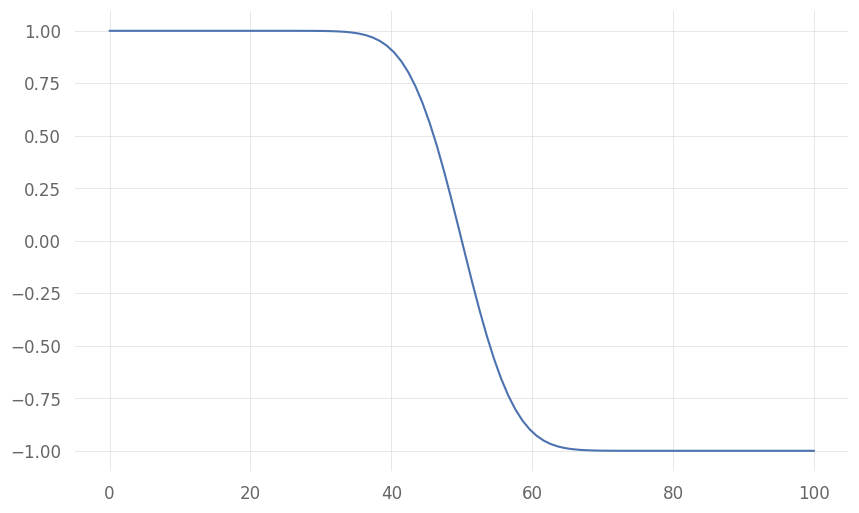

In [311]:
plt.plot(X,_y)
plt.show()

In [385]:
df_cum_score.columns

Index(['MSFT_cum_zscore', 'AMZN_cum_zscore', 'NAT_cum_zscore',
       'BAC_cum_zscore', 'DPZ_cum_zscore', 'DIS_cum_zscore', 'KO_cum_zscore',
       'MCD_cum_zscore', 'COST_cum_zscore', 'SBUX_cum_zscore',
       'buy_recommendation', 'sell_recommendation'],
      dtype='object')

In [386]:
df_performance_rank.columns

Index(['MSFT', 'AMZN', 'NAT', 'BAC', 'DPZ', 'DIS', 'KO', 'MCD', 'COST', 'SBUX',
       'MSFT_performance_rank', 'AMZN_performance_rank',
       'NAT_performance_rank', 'BAC_performance_rank', 'DPZ_performance_rank',
       'DIS_performance_rank', 'KO_performance_rank', 'MCD_performance_rank',
       'COST_performance_rank', 'SBUX_performance_rank',
       'buy_recommendation_per', 'sell_recommendation_per'],
      dtype='object')

In [387]:
df_sharpe.columns

Index(['MSFT_pct_change_20', 'AMZN_pct_change_20', 'NAT_pct_change_20',
       'BAC_pct_change_20', 'DPZ_pct_change_20', 'DIS_pct_change_20',
       'KO_pct_change_20', 'MCD_pct_change_20', 'COST_pct_change_20',
       'SBUX_pct_change_20', '^TYX_pct_change_20', 'MSFT_return_std_20',
       'MSFT_sharpe_ratio', 'AMZN_return_std_20', 'AMZN_sharpe_ratio',
       'NAT_return_std_20', 'NAT_sharpe_ratio', 'BAC_return_std_20',
       'BAC_sharpe_ratio', 'DPZ_return_std_20', 'DPZ_sharpe_ratio',
       'DIS_return_std_20', 'DIS_sharpe_ratio', 'KO_return_std_20',
       'KO_sharpe_ratio', 'MCD_return_std_20', 'MCD_sharpe_ratio',
       'COST_return_std_20', 'COST_sharpe_ratio', 'SBUX_return_std_20',
       'SBUX_sharpe_ratio', 'buy_recommendation_sharpe',
       'sell_recommendation_sharpe'],
      dtype='object')

In [397]:
df = df_cum_score.merge(df_sharpe, left_index=True, right_index=True).merge(df_performance_rank, left_index=True, right_index=True)

In [398]:
df = df[[col for col in df.columns if re.search(".*recommendation.*", col)]]

In [401]:
df.columns

Index(['buy_recommendation_zscore', 'sell_recommendation_zscore',
       'buy_recommendation_sharpe', 'sell_recommendation_sharpe',
       'buy_recommendation_per', 'sell_recommendation_per'],
      dtype='object')

In [402]:
df.head()

,buy_recommendation_zscore,sell_recommendation_zscore,buy_recommendation_sharpe,sell_recommendation_sharpe,buy_recommendation_per,sell_recommendation_per
Date,,,,,,
2019-12-06,"[{'COST': 0.9999926345973377}, {'DPZ': 0.99999...","[{'NAT': -1.0}, {'MCD': -0.9999999999999926}]","[{'KO': 3.8372944140467844}, {'DIS': 4.9754078...","[{'COST': 1.122056944038532}, {'AMZN': 1.62234...","[{'MSF': 145.4372100830078}, {'DI': 145.631912...","[{'AMZN': -2.8088593663403802}, {'DPZ': -2.697..."
2019-12-09,"[{'COST': 0.9997702581257896}, {'DPZ': 0.99999...","[{'NAT': -1.0}, {'SBUX': -0.9999999999924244}]","[{'KO': 3.866098609284175}, {'SBUX': 4.2410618...","[{'MCD': 2.093043185521019}, {'BAC': 2.2352275...","[{'DI': 144.20184326171875}, {'MSF': 145.06343...","[{'DIS': -3.0161965425422723}, {'DPZ': -2.6818..."
2019-12-10,"[{'MSFT': 0.9997557683697859}, {'DPZ': 0.99999...","[{'NAT': -0.9999999999962011}, {'SBUX': -0.999...","[{'SBUX': 4.428792132022334}, {'DIS': 4.540825...","[{'NAT': 2.4280057398202164}, {'MCD': 2.620595...","[{'DI': 144.0933380126953}, {'MSF': 144.843017...","[{'AMZN': -1.7680423039410036}, {'DIS': -1.697..."
2019-12-11,"[{'MSFT': 0.9662386553229071}, {'COST': 0.9927...","[{'NAT': -0.9999999990406004}, {'SBUX': -0.999...","[{'SBUX': 4.20583679182492}, {'DIS': 4.2963861...","[{'NAT': 2.0369108215531715}, {'MCD': 2.530759...","[{'MSF': 145.3892822265625}, {'DI': 145.562866...","[{'AMZN': -0.6845042468372208}, {'KO': -0.6302..."
2019-12-12,"[{'DPZ': -0.003636499450972367}, {'COST': 0.30...","[{'SBUX': -1.0}, {'MCD': -0.9999999999999926}]","[{'SBUX': 2.643103248577448}, {'MSFT': 2.79183...","[{'COST': -0.26880207436692766}, {'DIS': 0.179...","[{'DI': 145.73052978515625}, {'MSF': 146.86521...","[{'KO': -0.09236577893616049}, {'DIS': 0.21656..."


In [413]:
df_slope = df_original.copy()

In [414]:
df_slope = df_slope[ticker]

In [415]:
for _t in ticker:
    df_slope[f"{_t}_shift1"] = df_slope[f"{_t}"].shift(1)
    df_slope[f"{_t}_shift6"] = df_slope[f"{_t}"].shift(6)
    df_slope[f"{_t}_shift7"] = df_slope[f"{_t}"].shift(7)
    df_slope[f"{_t}_slope"] = ((df_slope[f"{_t}"] + df_slope[f"{_t}_shift1"])-(df_slope[f"{_t}_shift6"] + df_slope[f"{_t}_shift7"]))/(2*df_slope[f"{_t}"] )
    

In [416]:
df_slope.dropna(inplace=True)

In [417]:
df_slope = df_slope[[col for col in df_slope.columns if re.search(f".*slope.*", col)]]

In [459]:
df_original["MSFT"][-10:]

Date
2024-10-24    424.730011
2024-10-25    428.149994
2024-10-28    426.589996
2024-10-29    431.950012
2024-10-30    432.529999
2024-10-31    406.350006
2024-11-01    410.369995
2024-11-04    408.459991
2024-11-05    411.459991
2024-11-06    420.179993
Name: MSFT, dtype: float64

In [454]:
df_slope["MSFT_slope"][-20:]

Date
2024-10-10   -0.005435
2024-10-11   -0.001814
2024-10-14    0.003412
2024-10-15    0.014663
2024-10-16    0.012749
2024-10-17    0.000804
2024-10-18    0.001889
2024-10-21    0.005707
2024-10-22    0.012666
2024-10-23    0.016757
2024-10-24    0.017034
2024-10-25    0.023403
2024-10-28    0.023278
2024-10-29    0.025003
2024-10-30    0.021027
2024-10-31   -0.016279
2024-11-01   -0.039732
2024-11-04   -0.041681
2024-11-05   -0.042313
2024-11-06   -0.032010
Name: MSFT_slope, dtype: float64

In [424]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline
# sns.set_style('darkgrid')

In [457]:
plt.plot(df_original[-10:].index, "MSFT", data=df_original[-10:])

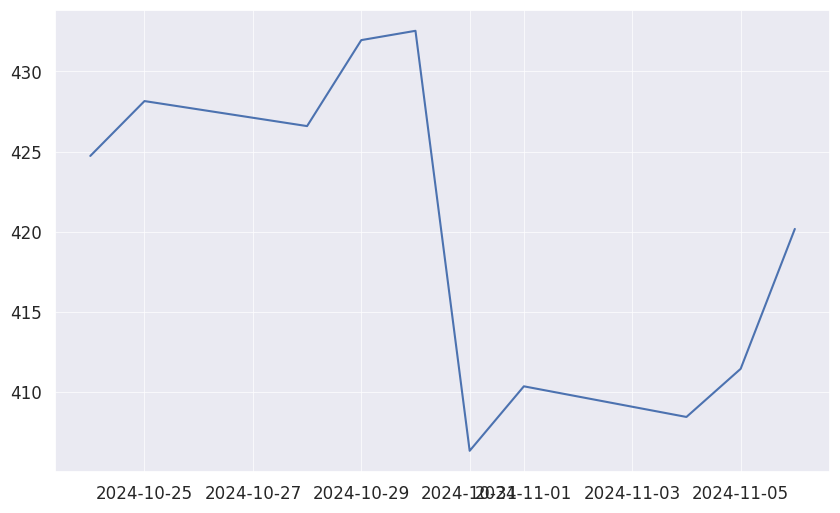

In [458]:
plt.show()